## Code

In [1]:
import sys

sys.path.append('..')

In [2]:
from finance.discountfactor import ConstantRateDiscountFactor 

r = 0.02
discount = ConstantRateDiscountFactor(r)

In [3]:
import numpy as np
from scipy.stats import norm
from maths.montecarlo.processes.brownianmotions import GeometricBrownianMotion

maturity = 5.
step = 1./360
time_grid = GeometricBrownianMotion.generate_time_grid(0, maturity, step)

x_0 = [100]
mu_s = [[0.12]]
sigma_s = [0.2]

gbm = GeometricBrownianMotion(time_grid, x_0, mu_s, sigma_s)

In [4]:
print gbm.drifts
print gbm.vols

[[ 0.12]]
[[ 0.2]]


In [5]:
from finance.products.european.swap import (
    SwapContract,
)

delta = 0.25
coupon_dates = SwapContract.generate_payment_dates(0, maturity, delta)

swap = SwapContract(gbm, discount, coupon_dates)
print swap

Swap contract of maturity T = 5 years, over S^0 with strike K = 140.352, paying at {0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00}


### Test profile

In [6]:
p_fixed = 1.
strike = swap.strike

delta_times = swap.delta_time
discount_factors = [discount(t) for t in swap.pillars[1:]]

delta_beta_sum = np.dot(delta_times, discount_factors)

notional = p_fixed / (strike*delta_beta_sum)
print "Notional = %.3f" % notional

Notional = 0.002


In [7]:
N = 1000
prices = np.zeros((N, len(time_grid)))

for i in range(N):
    gbm.simulate()
    for (j, t) in enumerate(time_grid):
        prices[i, j] = notional*swap.price(t)

In [8]:
q95 = np.percentile(prices, 97.5, axis=0)
q5 = np.percentile(prices, 2.5, axis=0)
price_avg = np.mean(prices, 0)

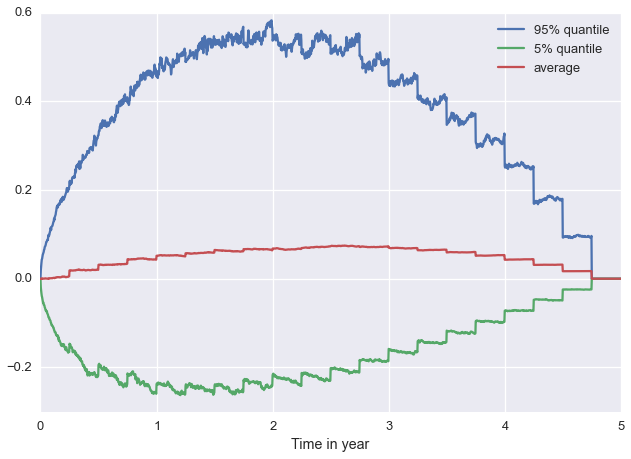

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_context("talk")

plt.xlabel('Time in year')
plt.plot(time_grid, q95, label='95% quantile')
plt.plot(time_grid, q5, label='5% quantile')
plt.plot(time_grid, price_avg, label='average')
plt.legend(loc='best')
plt.show()